Descriptive Analytics and Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
df = pd.read_csv("sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [2]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [4]:
df_cat=df[df.columns[[0,1,2,3,5,6,7]]]
df_cat

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


In [5]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    450 non-null    object
 1   Day     450 non-null    object
 2   SKU     450 non-null    object
 3   City    450 non-null    object
 4   BU      450 non-null    object
 5   Brand   450 non-null    object
 6   Model   450 non-null    object
dtypes: object(7)
memory usage: 24.7+ KB


In [6]:
df_num=df[df.columns[[4,8,9,10,11,12]]]
df_num

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [9]:
# mean
df_num.mean()

,0
Volume,5.066667
Avg Price,10453.433333
Total Sales Value,33812.835556
Discount Rate (%),15.155242
Discount Amount,3346.499424
Net Sales Value,30466.336131


In [10]:
# median
df_num.median()

,0
Volume,4.000000
Avg Price,1450.000000
Total Sales Value,5700.000000
Discount Rate (%),16.577766
Discount Amount,988.933733
Net Sales Value,4677.788059


In [11]:
# mode
df_num.mode()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,3.0,400.0,24300.0,5.007822,69.177942,326.974801
1,NaN,450.0,NaN,5.055218,73.025199,330.822058
2,NaN,500.0,NaN,5.059801,93.649161,466.350839
3,NaN,1300.0,NaN,5.072124,94.682735,485.317265
4,NaN,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...
445,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,19.976879,21496.675367,163967.080070
448,NaN,NaN,NaN,19.982257,25328.224204,166263.161348


In [12]:
# standard deviation
df_num.std()

,0
Volume,4.231602
Avg Price,18079.904840
Total Sales Value,50535.074173
Discount Rate (%),4.220602
Discount Amount,4509.902963
Net Sales Value,46358.656624


 Mean: The average value of each numerical column.  A high mean for 'sales' might indicate strong overall sales performance.

Median: The middle value when the data is ordered.  If the mean and median are significantly different, it suggests the presence of outliers.  For example, a much lower median 'sales' compared to the mean would indicate a few very high sales values skewing the average upwards.

Mode: The most frequent value in each column. Useful for categorical data but can also reveal common sales amounts or quantities.

Standard Deviation: Measures the spread or dispersion of data around the mean.  A high standard deviation for 'profit' indicates high variability in profits, while a low standard deviation implies more stable profits.

In [14]:
is_numeric_dtype(df['Volume'])

True

In [15]:
is_numeric_dtype(df['Date'])

False

In [16]:
is_numeric_dtype(df['Day'])

False

In [17]:
is_numeric_dtype(df['SKU'])

False

In [18]:
is_numeric_dtype(df['City'])

False

In [19]:
is_numeric_dtype(df['Avg Price'])

True

In [20]:
is_numeric_dtype(df['Total Sales Value'])

True

In [21]:
is_numeric_dtype(df['Discount Rate (%)'])

True

In [22]:
is_numeric_dtype(df['Discount Amount'])

True

In [23]:
is_numeric_dtype(df['Net Sales Value'])

True

In [24]:
is_numeric_dtype(df['BU'])

False

In [25]:
is_numeric_dtype(df['Model'])

False

# **DATA VISUALIZATION**

(array([213., 137.,  49.,  26.,  15.,   2.,   0.,   4.,   1.,   3.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

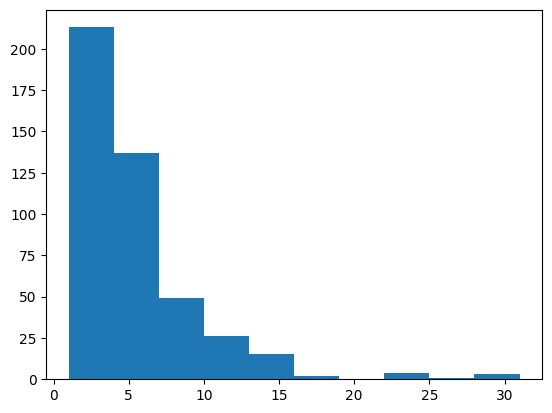

In [26]:
import matplotlib.pyplot as plt
plt.hist(df_num['Volume'])

(array([300.,  60.,  15.,  15.,   0.,   0.,   0.,   0.,  30.,  30.]),
 array([  290.,  6271., 12252., 18233., 24214., 30195., 36176., 42157.,
        48138., 54119., 60100.]),
 <BarContainer object of 10 artists>)

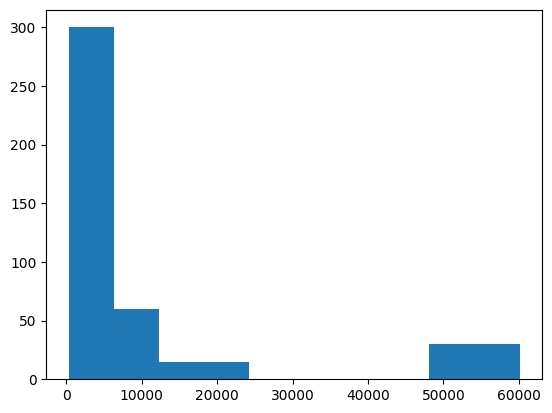

In [27]:
import matplotlib.pyplot as plt
plt.hist(df_num['Avg Price'])

(array([305.,  24.,  15.,  18.,  12.,  27.,  15.,  15.,  11.,   8.]),
 array([   400.,  20000.,  39600.,  59200.,  78800.,  98400., 118000.,
        137600., 157200., 176800., 196400.]),
 <BarContainer object of 10 artists>)

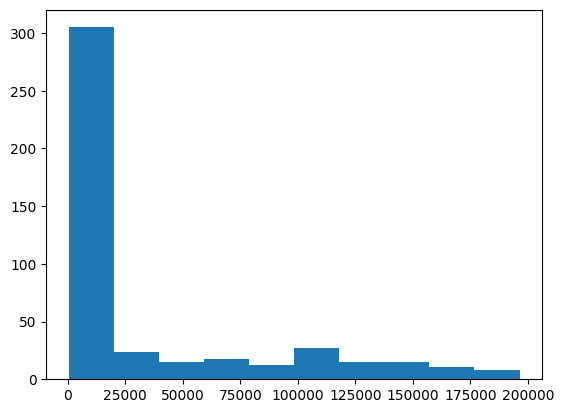

In [28]:
import matplotlib.pyplot as plt
plt.hist(df_num['Total Sales Value'])

(array([ 27.,  24.,  29.,  14.,  14.,   6.,  38.,  96., 115.,  87.]),
 array([ 5.00782219,  6.50628067,  8.00473916,  9.50319765, 11.00165613,
        12.50011462, 13.9985731 , 15.49703159, 16.99549007, 18.49394856,
        19.99240704]),
 <BarContainer object of 10 artists>)

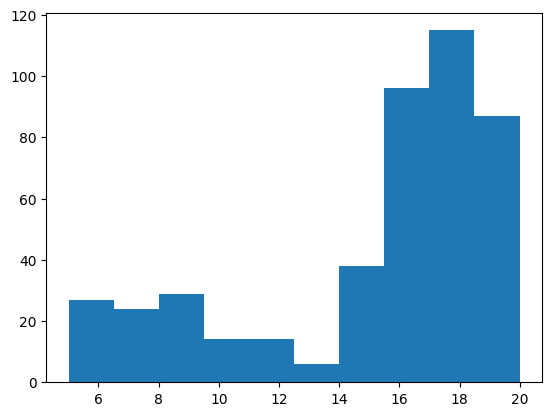

In [29]:
import matplotlib.pyplot as plt
plt.hist(df_num['Discount Rate (%)'])

(array([299.,  37.,  42.,  29.,  22.,   8.,   9.,   0.,   2.,   2.]),
 array([   69.17794229,  2636.06236744,  5202.94679258,  7769.83121773,
        10336.71564288, 12903.60006802, 15470.48449317, 18037.36891832,
        20604.25334346, 23171.13776861, 25738.02219376]),
 <BarContainer object of 10 artists>)

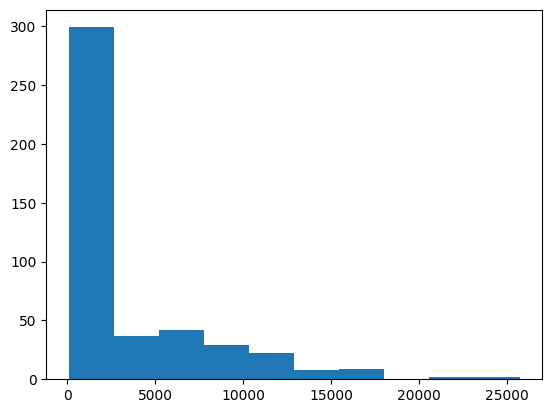

In [30]:
import matplotlib.pyplot as plt
plt.hist(df_num['Discount Amount'])

(array([306.,  26.,  17.,  14.,   8.,  30.,  16.,  15.,  12.,   6.]),
 array([   326.97480055,  18245.0252254 ,  36163.07565025,  54081.1260751 ,
         71999.17649994,  89917.22692479, 107835.27734964, 125753.32777448,
        143671.37819933, 161589.42862418, 179507.47904902]),
 <BarContainer object of 10 artists>)

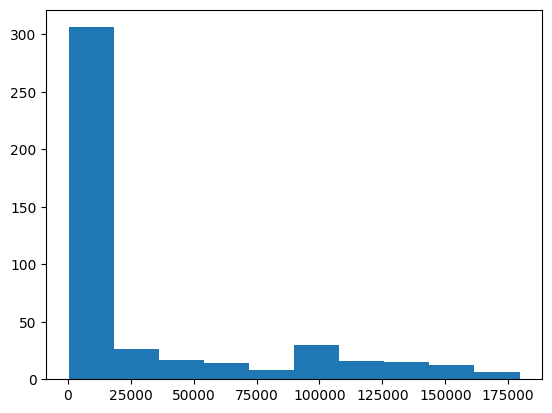

In [31]:
import matplotlib.pyplot as plt
plt.hist(df_num['Net Sales Value'])

 import the matplotlib to using this one to find the higher and lower value of the numerical data set in every columns

# **Plot histograms for each numerical column**

In [34]:
import seaborn as sns
from scipy.stats import skew
df_num.skew()

,0
Volume,2.731724
Avg Price,1.908873
Total Sales Value,1.534729
Discount Rate (%),-1.062294
Discount Amount,1.913038
Net Sales Value,1.540822


Volume
2.731723626557714


<Axes: xlabel='Volume', ylabel='Count'>

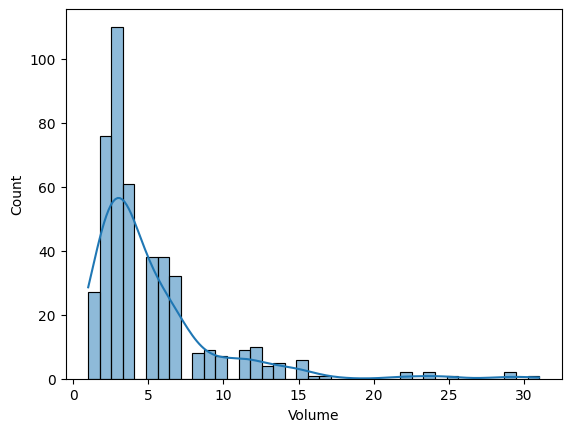

In [35]:
print('Volume')
data=(df_num['Volume'].skew())
print(data)
sns.histplot(df_num['Volume'], kde=True)

Avg Price
1.9088730767759727


<Axes: xlabel='Avg Price', ylabel='Count'>

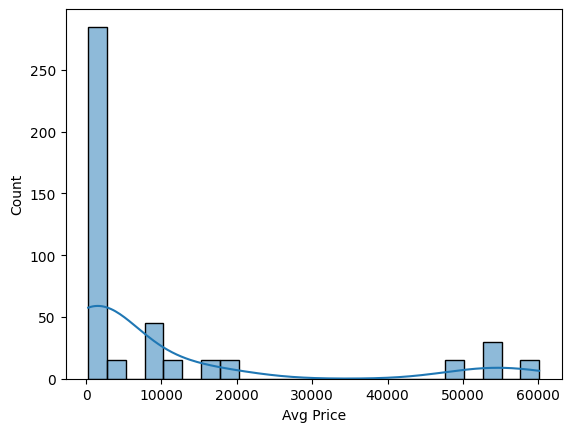

In [36]:
print('Avg Price')
data = (df_num['Avg Price'].skew())
print(data)
sns.histplot(df_num['Avg Price'],kde=True)

Total Sales Value
1.5347293238977937


<Axes: xlabel='Total Sales Value', ylabel='Count'>

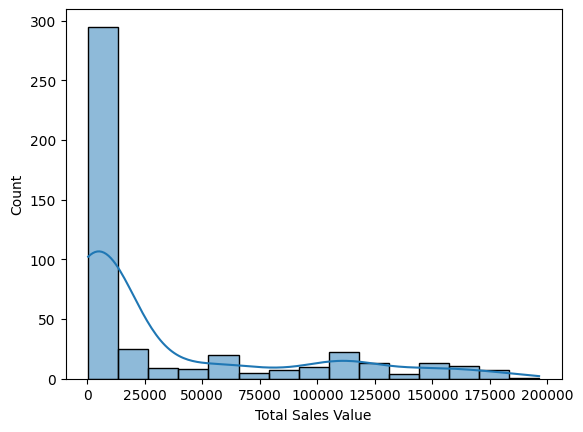

In [37]:
print('Total Sales Value')
print(df_num['Total Sales Value'].skew())
sns.histplot(df_num['Total Sales Value'],kde=True)

Discount Rate (%)
-1.0622943696988825


<Axes: xlabel='Discount Rate (%)', ylabel='Count'>

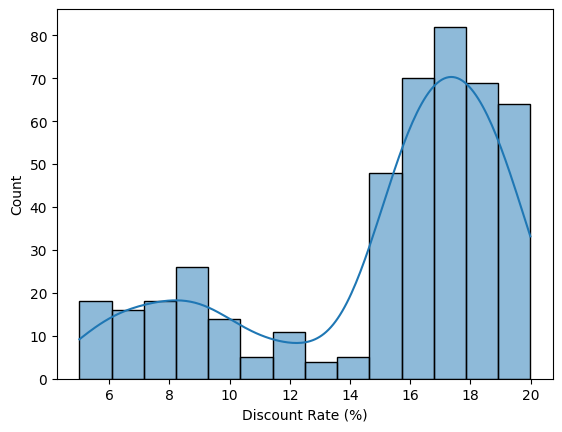

In [38]:
print('Discount Rate (%)')
print(df_num['Discount Rate (%)'].skew())
sns.histplot(df_num['Discount Rate (%)'],kde=True)

Discount Amount
1.9130377339538271


<Axes: xlabel='Discount Amount', ylabel='Count'>

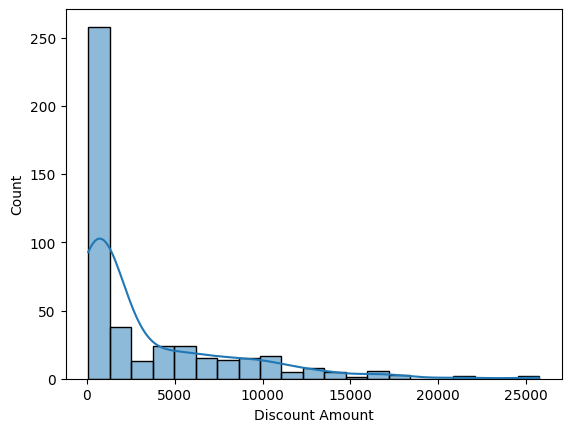

In [39]:
print('Discount Amount')
print(df_num['Discount Amount'].skew())
sns.histplot(df_num['Discount Amount'], kde=True)

Net Sales Value
1.5408217575344376


<Axes: xlabel='Net Sales Value', ylabel='Count'>

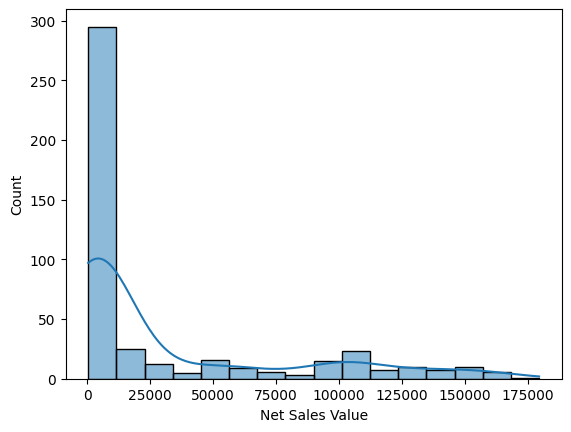

In [40]:
print('Net Sales Value')
print(df_num['Net Sales Value'].skew())
sns.histplot(df_num['Net Sales Value'], kde=True)

import the seaborn to use the finding of skewness in evary columns

# **boxplots for numerical variables**

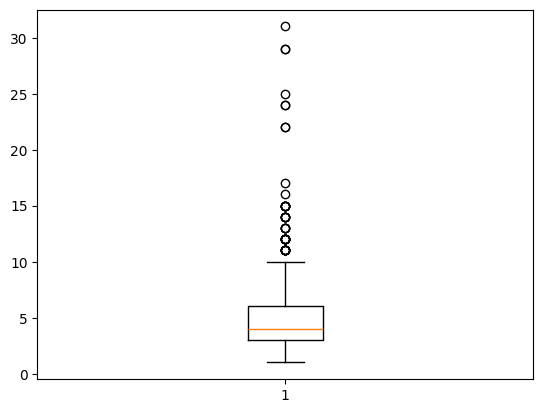

In [42]:
plt.boxplot(df_num['Volume'])
plt.show()

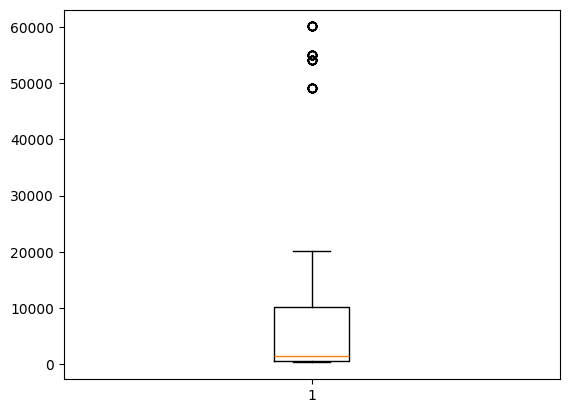

In [43]:
plt.boxplot(df_num['Avg Price'],vert=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7e9dcc2718d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9dcc270a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9dcc2693d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9dcc273890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9dcc242d90>],
 'means': []}

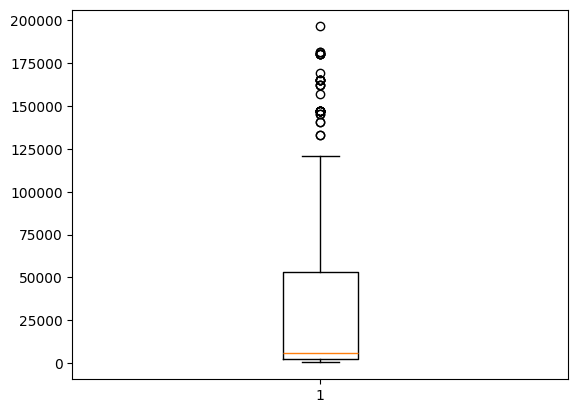

In [44]:
plt.boxplot(df_num['Total Sales Value'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e9dcc208dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9dcc3b56d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9dcc20bcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9dcc20a3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9dcc213090>],
 'means': []}

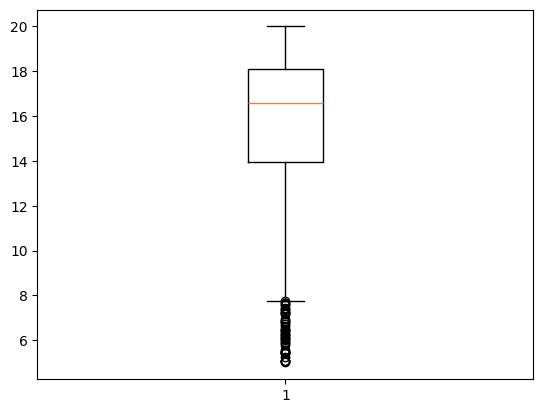

In [45]:
plt.boxplot(df_num['Discount Rate (%)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e9dcc2c7d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9dcc0d4ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9dcc2c7510>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9dcc0d6390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9dcc0d6d10>],
 'means': []}

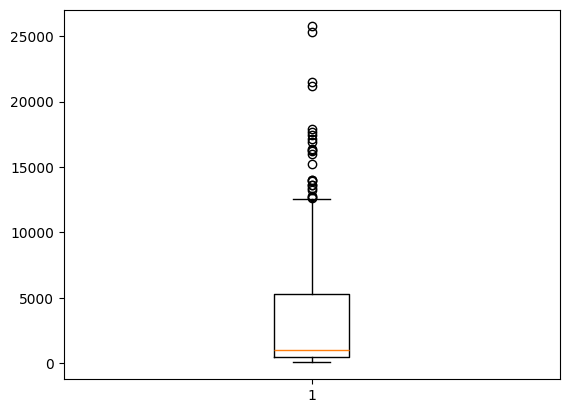

In [46]:
plt.boxplot(df_num['Discount Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e9dcc1280d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9dcc129490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9dcc123650>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9dcc12a850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9dcc12afd0>],
 'means': []}

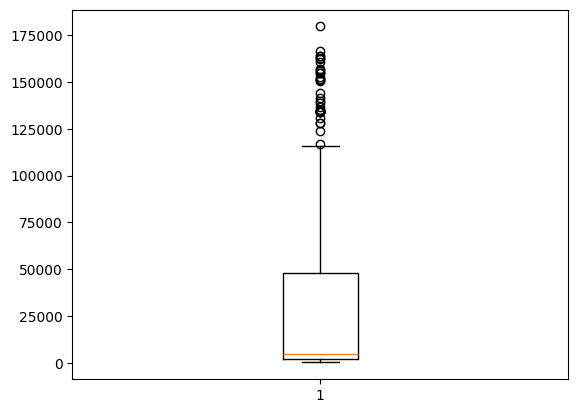

In [47]:
plt.boxplot(df_num['Net Sales Value'])

# **interquartile range**

In [50]:
Q1=df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR

,0
Volume,3.000000
Avg Price,9635.000000
Total Sales Value,50500.000000
Discount Rate (%),4.149656
Discount Amount,4856.036123
Net Sales Value,45645.704206


In [51]:
df_num

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [52]:
df_cat

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


# **Bar Chart Analysis for Categorical Column**

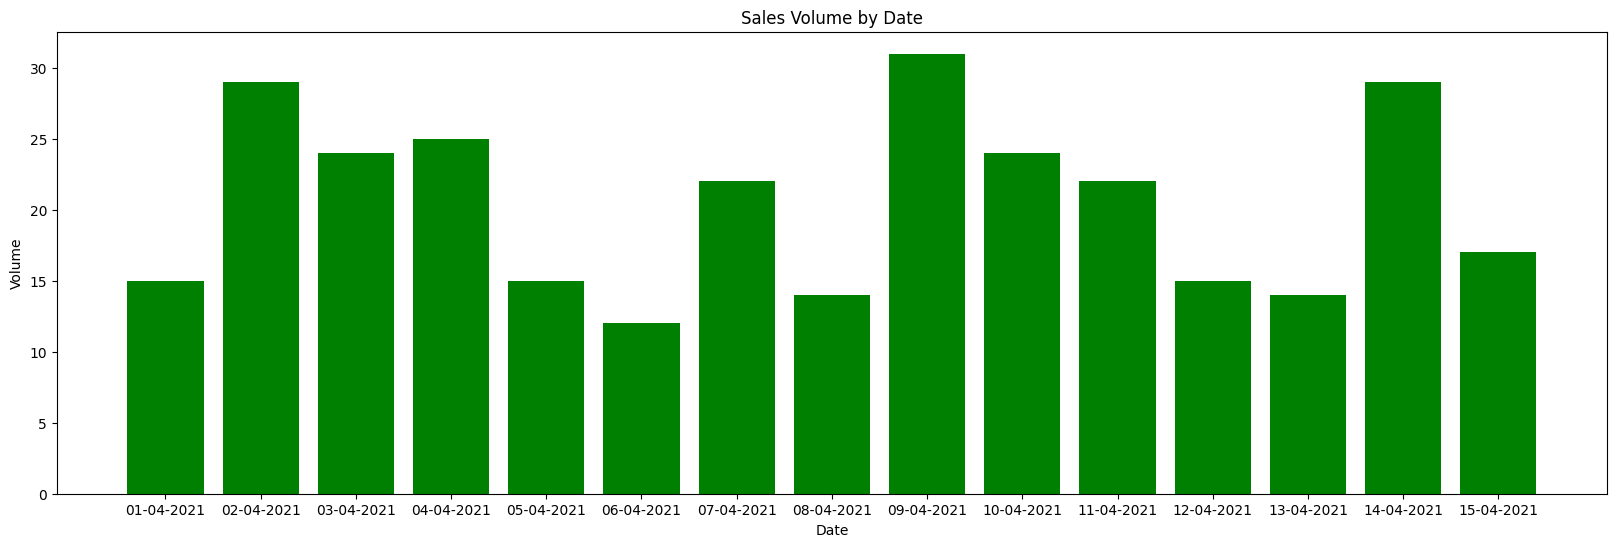

In [58]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(df_cat['Date'], df_num['Volume'], color='g')
ax.set_xlabel("Date")
ax.set_ylabel("Volume")
ax.set_title("Sales Volume by Date")
plt.show()

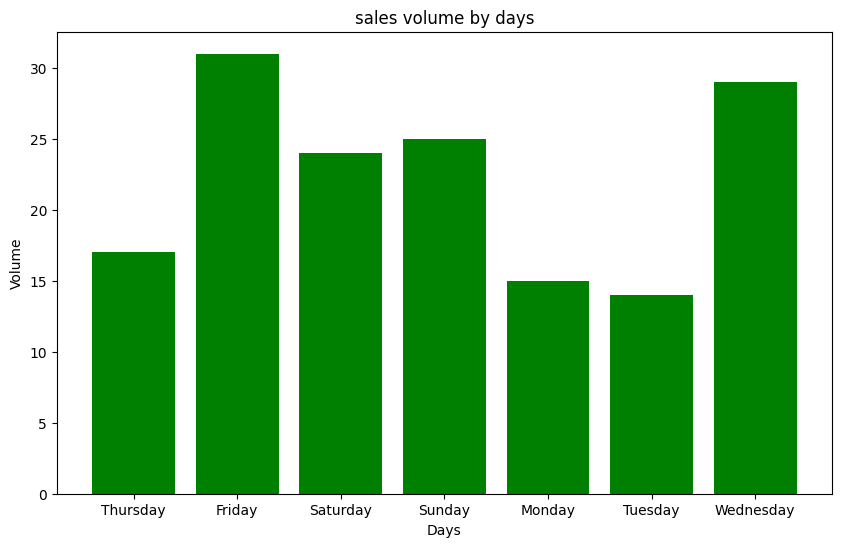

In [61]:
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(df_cat['Day'],df_num['Volume'],color='g')
ax.set_xlabel("Days")
ax.set_ylabel("Volume")
ax.set_title("sales volume by days")
plt.show()

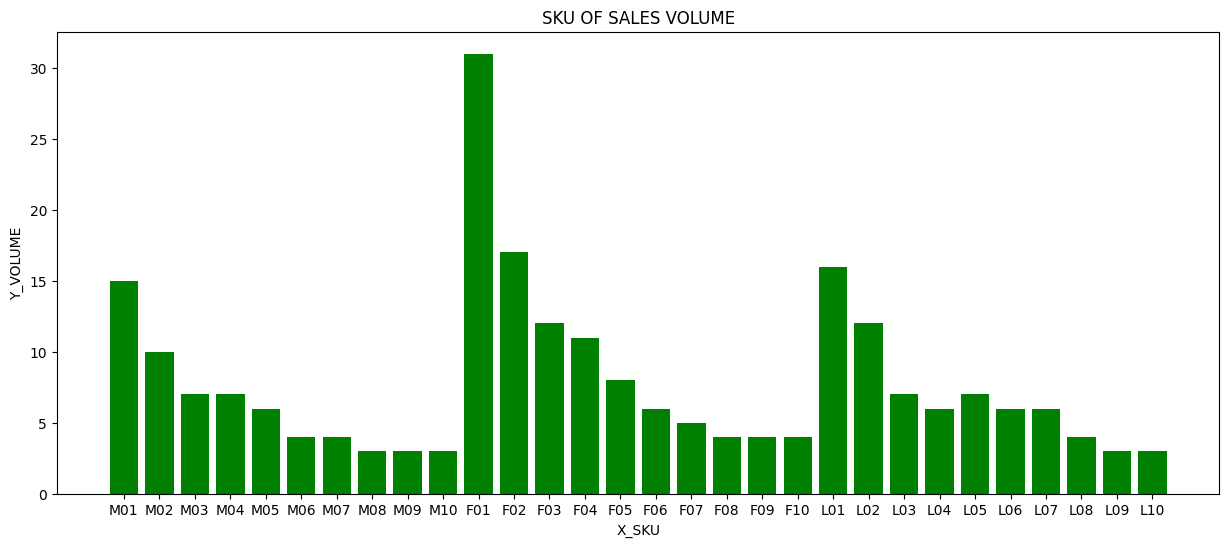

In [69]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(df_cat['SKU'], df_num['Volume'], color='g')
ax.set_xlabel("X_SKU")
ax.set_ylabel("Y_VOLUME")
ax.set_title("SKU OF SALES VOLUME")
plt.show()

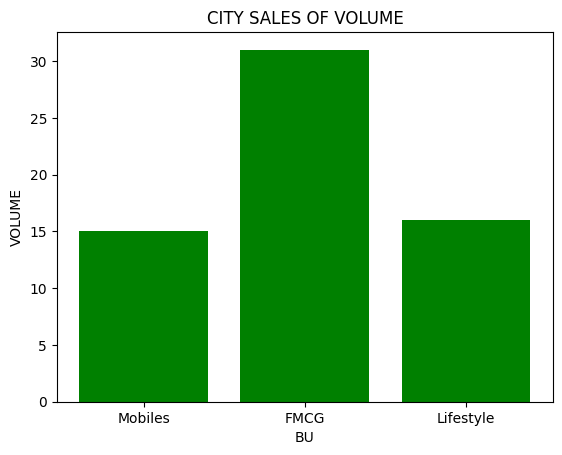

In [70]:
plt.bar(df_cat['BU'],df_num['Volume'],color='g')
plt.xlabel("BU")
plt.ylabel("VOLUME")
plt.title("CITY SALES OF VOLUME")
plt.show()

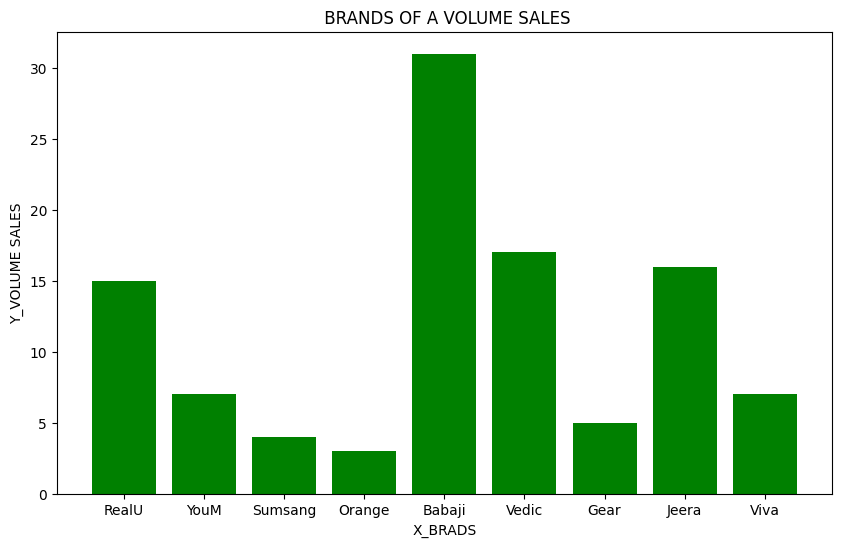

In [73]:
width = 10
height = 6
plt.figure(figsize=(width, height))
plt.bar(df_cat['Brand'],df_num['Volume'],color='g')
plt.xlabel("X_BRADS")
plt.ylabel("Y_VOLUME SALES")
plt.title(" BRANDS OF A VOLUME SALES")
plt.show()

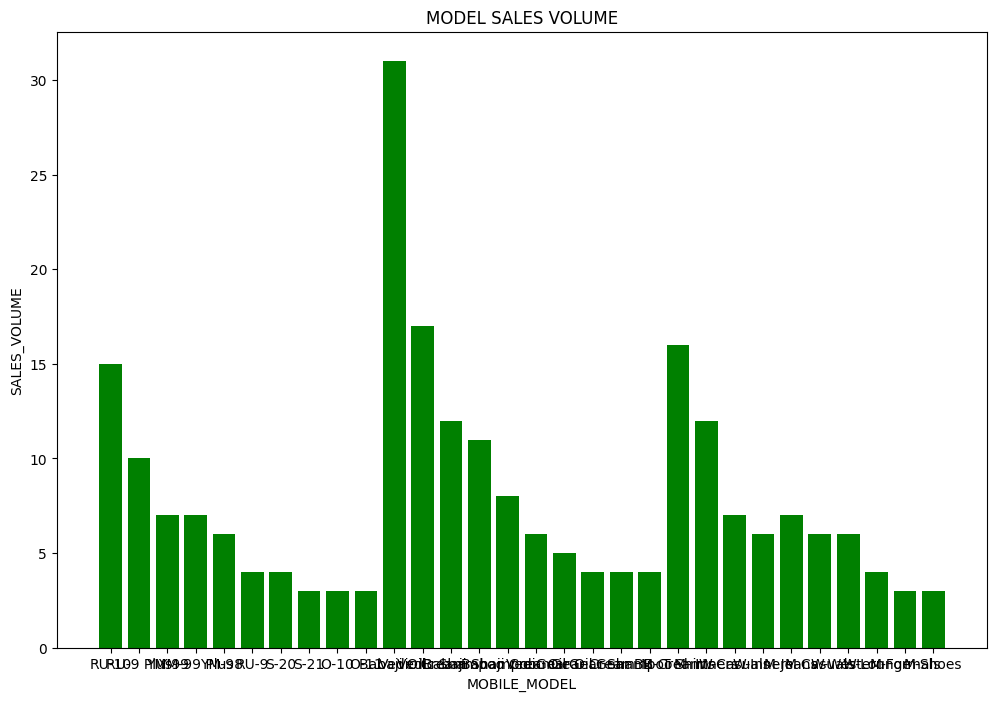

In [82]:
plt.figure(figsize=(12, 8))
plt.bar(df_cat['Model'],df_num['Volume'], color='g')
plt.xlabel("MOBILE_MODEL")
plt.ylabel("SALES_VOLUME")
plt.title("MODEL SALES VOLUME")
plt.show()

# **Stadardization of numerical veriable**

In [81]:
df_num

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [83]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_X=SS.fit_transform(df_num)
SS_X=pd.DataFrame(SS_X)
SS_X.columns=list(df_num)
SS_X

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


# **Conversion of Categorical Data into Dummy Variables**

In [84]:
from sklearn.preprocessing import OneHotEncoder
OE=OneHotEncoder()
d1 = pd.DataFrame(OE.fit_transform(df_cat[['Date']]).toarray(), columns=OE.categories_[0])
d2 = pd.DataFrame(OE.fit_transform(df_cat[['Day']]).toarray(), columns=OE.categories_[0])
d3 = pd.DataFrame(OE.fit_transform(df_cat[['SKU']]).toarray(), columns=OE.categories_[0])
d4 = pd.DataFrame(OE.fit_transform(df_cat[['City']]).toarray(), columns=OE.categories_[0])
d5 = pd.DataFrame(OE.fit_transform(df_cat[['BU']]).toarray(), columns=OE.categories_[0])
d6 = pd.DataFrame(OE.fit_transform(df_cat[['Brand']]).toarray(), columns=OE.categories_[0])
d7 = pd.DataFrame(OE.fit_transform(df_cat[['Model']]).toarray(), columns=OE.categories_[0])
dfOE = pd.concat([d1, d2, d3, d4, d5, d6, d7], axis=1)
print(dfOE.head())
print(dfOE.shape)

   01-04-2021  02-04-2021  03-04-2021  04-04-2021  05-04-2021  06-04-2021  \
0         1.0         0.0         0.0         0.0         0.0         0.0   
1         1.0         0.0         0.0         0.0         0.0         0.0   
2         1.0         0.0         0.0         0.0         0.0         0.0   
3         1.0         0.0         0.0         0.0         0.0         0.0   
4         1.0         0.0         0.0         0.0         0.0         0.0   

   07-04-2021  08-04-2021  09-04-2021  10-04-2021  ...  Vedic Cream  \
0         0.0         0.0         0.0         0.0  ...          0.0   
1         0.0         0.0         0.0         0.0  ...          0.0   
2         0.0         0.0         0.0         0.0  ...          0.0   
3         0.0         0.0         0.0         0.0  ...          0.0   
4         0.0         0.0         0.0         0.0  ...          0.0   

   Vedic Oil  Vedic Shampoo  W-Casuals  W-Inners  W-Lounge  W-Western  YM-98   \
0        0.0            0.0  

In [85]:
df_final=pd.concat([SS_X,dfOE],axis=1)
df_final
df_final.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,01-04-2021,02-04-2021,03-04-2021,04-04-2021,...,Vedic Cream,Vedic Oil,Vedic Shampoo,W-Casuals,W-Inners,W-Lounge,W-Western,YM-98,YM-99,YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Conclusion:

Summary of Key Findings:

* Descriptive statistics (mean, median, mode, standard deviation) revealed key information about the distribution of numerical variables like 'Volume', 'Avg Price', 'Total Sales Value', etc.  For example, a high mean sales value with a large standard deviation suggests variability in sales performance.  Differences between mean and median indicated potential outliers, requiring further investigation.

* Histograms and KDE plots showed the distribution shapes for numerical variables, revealing skewness and potential outliers.  Skewness in 'Total Sales Value', for example, might warrant transformations for certain modeling techniques.

* Boxplots visually represented the distribution, quartiles, and outliers in numerical data.

* Bar charts for categorical variables like 'Date', 'Day', 'SKU', 'City' provided insights into sales volume trends across different categories. Visualizations made it possible to observe patterns and relationships more effectively. For instance, sales might be higher on specific days of the week.

* Standardization (using StandardScaler) transformed numerical features to have zero mean and unit variance, which is crucial for many machine learning algorithms that are sensitive to feature scales.

* One-hot encoding converted categorical features into numerical representations (dummy variables), enabling the use of these features in algorithms that require numerical input.


Reflection on Data Preprocessing:

* Standardization is vital for machine learning models that rely on distance calculations (e.g., k-nearest neighbors, support vector machines).  Without standardization, features with larger values could disproportionately influence the model.  It ensures that all numerical features contribute equally to the model's learning process.

* One-hot encoding is essential for handling categorical data in machine learning models.  It avoids imposing an ordinal relationship between categories (which may not exist). One-hot encoding provides a numerical representation suitable for algorithms that can't interpret categorical features directly.  This enhances model performance and accuracy.  Without this, these algorithms cannot process non-numerical data.